# Коломейцев Юрий, БД

# Лабораторная работа 3. Нейронные сети

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_03.ipynb.

## Алгоритм обратного распространения ошибки

**(4 балла)** Вам необходимо реализовать небольшой программный комплекс для обучения полносвязных нейронных сетей в рамках задачи классификации. 

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/cnn.png" width=500>
</img>

Программный комплекс должен поддерживать минимальный набор базовых слоев и обучение сети методом стохастического градиентного спуска с подсчетом градиентов с помощью обратного распространения ошибки. На входе у каждого из слоев будет вектор $x\in\mathbb{R}^n$, который является выходом предыдущего слоя.
Список поддерживаемых слоев должен включать в себя:

 - Полносвязный слой (Linear) с заданием количества выходных нейронов $k$:
 
 $$\mathrm{Linear} \equiv f\left(\textbf{x}\right)=\textbf{W}\textbf{x}+\textbf{b},$$
 
 где $\textbf{W}\in\mathbb{R}^{(k,n)}$ - это матрица весов слоя, $\textbf{b}\in\mathbb{R}^k$ - вектор смещений слоя.
 
 
  - ReLU-слой (Rectified Linear Unit)
  
  $$\mathrm{ReLU}_{i} \equiv \max (0, x_i)$$


 - Softmax-слой, объединенный с cross-entropy функцией потерь. Softmax позволяет моделировать распределение вероятностей над дискретным набором классов:
     
     $$\mathrm{Softmax}_{i} \equiv p_{i}\left(\textbf{x}\right)=\frac{e^{x_{i}}}{\sum_{j}{e^{x_{j}}}}$$

    Функция потерь cross-entropy является обобщением двухклассовой логарифмической функции потерь на случай множества классов: 
    
    $$\mathcal{L}=-\sum_{i}{y_{i}\log{p_{i}}},$$

    где $\textbf{y}=\left[y_{1}...y_{i}...\right]$ $-$ это вектор, размерность которого равна количеству классов и в котором все элементы нулевые, за исключением одного элемента, соответствующего правильному классу.
    
    Можно показать, что частная производная связки softmax слоя и cross-entropy функции потерь по входу в softmax имеет простой вид:
    
    $$\frac{\partial \mathcal{L}}{\partial x_{i}}=p_{i}-y_{i}$$
    
Каждый из слоев должен быть написан в виде отдельного класса, с методами <i>forward</i> (прямой просчет выходов сети) и <i>backward</i> (обратный прогон сети с нахождением градиентов весовых коэффициентов):

    class Layer:
        def forward(self, input):
            pass
            
        def backward(self, input, gradOutput)
            pass
            
В метод <i>bprop</i> должен передаваться градиент по выходам данного слоя. Для слоя softmax на вход метода *fprop* должны подаваться не только выходы предыдущего слоя, но и метки классов (в виде двухэлементного списка матриц в переменной inputs).

При создании Dense слоя весовые коэффициенты должны инициализироваться из распределения $U(-0.01,0.01)$.

Кроме того, необходимо реализовать класс нейронной сети, который должен позволять конструировать сети из любой последовательности вышеназванных слоев и обучаться на входной выборке. Класс нейронной сети должен хранить в себе упорядоченный список слоев.

    class Sequential(Layer):
        def add(self, module):
            pass

        def updateOutput(self, input):
            pass

        def backward(self, input, gradOutput):
            pass

            
Можно предполагать, что softmax слой в сети один и всегда будет добавляться последним. Обучение должно происходить методом стохастического градиентного спуска с задаваемыми параметрами размера батча $K$ и шага обучения $\eta$:
$$\textbf{W} \leftarrow \textbf{W}-\eta \sum_{k=1}^{K}{\nabla_{\textbf{W}}L\left(\textbf{x}^k\right)}$$

В процессе обучения должен осуществляться подсчет как значения функции потерь (cross-entropy), так и ошибки классификации (процент ошибочных топ-1 предсказаний сети). Эти ошибки должны выводиться один раз в эпоху (проход по всем обучающим примерам).
В процессе написания комплекса вам понадобится добавлять различные вспомогательные функции в исходный шаблон.

Все вычисления в описанных методах должны быть реализованы в матричной форме.

In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [14]:
class Layer(object):
    
    def __init__ (self):
        self.output = None
        self.gradInput = None
    
    def forward(self, input):
        return self.updateOutput(input)

    def backward(self,input, gradOutput):
        self.updateGradInput(input, gradOutput)
        self.accGradParameters(input, gradOutput)
        return self.gradInput
    

    def updateOutput(self, input):
        pass

    def updateGradInput(self, input, gradOutput):
        pass   
    
    def accGradParameters(self, input, gradOutput):
        pass
    
    def zeroGradParameters(self):
        pass
        
    def getParameters(self):
        return []
        
    def getGradParameters(self):
        return []
    
    def __repr__(self):
        return "Layer"

    
class Linear(Layer):

    def __init__(self, n_in, n_out, w=None, b=None):
        super(Linear, self).__init__()
        
        stdv = 1. / np.sqrt(n_in) # or 0.01 as in the task
        
        if w is not None:
            self.W = w
        else:
            self.W = np.random.uniform(-stdv, stdv, size = (n_out, n_in))
            #self.W = np.random.randn(n_out, n_in) * 0.001
            
        if b is not None:
            self.b = b
        else:
            self.b = np.random.uniform(-stdv, stdv, size = n_out)
            #self.b = np.random.randn(n_out) * 0.001 # np.zeros(n_out) also ok

        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        """given X input, produces output: for linear it is y = wx + b""" 
        self.output = input.dot(self.W.T) + self.b
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        """given input and dL/d_output, computes dL/d_input"""
        self.gradInput = gradOutput.dot(self.W).reshape(input.shape)        
        return self.gradInput
    
    def accGradParameters(self, input, gradOutput):
        """given input and dL/d_output, computes dL/dW, dL/db"""
        self.gradW = gradOutput.T.dot(input).reshape(self.W.shape)
        self.gradb = np.ones_like(self.b) * gradOutput.sum(axis = 0)
        return self.gradW, self.gradb
    
    def zeroGradParameters(self):
        self.gradW.fill(0)
        self.gradb.fill(0)
        
    def getParameters(self):
        return [self.W, self.b]
    
    def getGradParameters(self):
        return [self.gradW, self.gradb]
    
    def __repr__(self):
        s = self.W.shape
        q = "Linear %d -> %d" % (s[1], s[0])
        return q
    

class SoftMax(Layer):
    def __init__(self):
         super(SoftMax, self).__init__()
    
    def updateOutput(self, input):
        # substract max for numerical stability
        input = np.subtract(input, input.max(axis=1, keepdims=True))
        self.output = np.exp(input)
        self.output = self.output / self.output.sum(axis=1, keepdims=True)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        exp = np.exp(np.subtract(input, input.max(axis=1, keepdims=True)))
        denom = exp.sum(axis=1, keepdims=True)
        
        e = np.diag(exp.dot(gradOutput.T))
        self.gradInput = - np.diag(e).dot(exp)    
        self.gradInput += exp * denom * gradOutput
        self.gradInput /= denom**2
        return self.gradInput


class ReLU(Layer):
    def __init__(self):
         super(ReLU, self).__init__()

    def updateOutput(self, input):
        self.output = np.maximum(0, input)
        return self.output
    
    def updateGradInput(self, input, gradOutput):
        self.gradInput = np.multiply(gradOutput, input > 0)
        return self.gradInput

Класс Layer является базовым для классов: Linear, SoftMax, ReLU, у которых перегружены некоторые функции.

## Cross-Entropy Loss

In [15]:
class Criterion:
    def forward(self, input, target):
        return self.updateOutput(input, target)

    def backward(self, input, target):
        return self.updateGradInput(input, target)
    
    def updateOutput(self, input, target):
        return self.output

    def updateGradInput(self, input, target):
        return self.gradInput   

    def __repr__(self):
        return "Criterion"
    

class CrossEntropyCriterion(Criterion):
    def updateOutput(self, input, target):
        self.output = -1.0 / input.shape[0] * (target * np.log(input)).sum()
        return self.output

    def updateGradInput(self, input, target):
        self.gradInput = -1.0 / input.shape[0] * target / input
        return self.gradInput

## Sequential

In [16]:
class Sequential(Layer):

    def __init__ (self):
        super(Sequential, self).__init__()
        self.modules = []
   
    def add(self, module):
        self.modules.append(module)

    def updateOutput(self, input):
        self.output = input
        for module in self.modules:
            module.y = self.output
            self.output = module.forward(self.output)
        return self.output

    def backward(self, input, gradOutput):
        self.curent_grad = gradOutput
        
        for module in reversed(self.modules):
            self.curent_grad = module.backward(module.y, self.curent_grad)

        return self.gradInput

    def zeroGradParameters(self): 
        for module in self.modules:
            module.zeroGradParameters()
    
    def getParameters(self):
        return [x.getParameters() for x in self.modules]
    
    def getGradParameters(self):
        return [x.getGradParameters() for x in self.modules]
    
    def __repr__(self):
        string = "".join([str(x) + '\n' for x in self.modules])
        return string
    
    def __getitem__(self,x):
        return self.modules.__getitem__(x)

## Стохастический градиентный спуск (SGD)

Ниже располагается функция, реализующая алгоритм стохастического градиентного спуска с momentum

In [17]:
def sgd_momentum(x, dx, config, state):
    state.setdefault('old_grad', {})    
    i = 0 
    for cur_layer_x, cur_layer_dx in zip(x,dx): 
        for cur_x, cur_dx in zip(cur_layer_x,cur_layer_dx):
            
            cur_old_grad = state['old_grad'].setdefault(i, np.zeros_like(cur_dx))
            
            np.add(config['momentum'] * cur_old_grad, config['learning_rate'] * cur_dx, out = cur_old_grad)
            
            cur_x -= cur_old_grad
            i += 1

#### Функция, генерирующая случайные батчи

In [18]:
# batch generator
def get_batches(X, Y, batch_size):
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

С помощью разработанных вами классов решите задачу классификации изображений [MNIST](http://yann.lecun.com/exdb/mnist/).

In [19]:
from mnist_loader import load_dataset

X_train,y_train,X_test,y_test = load_dataset()

Несколько примеров объектов из нашей выборки

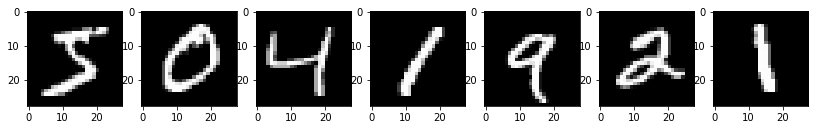

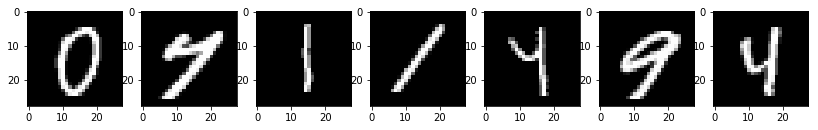

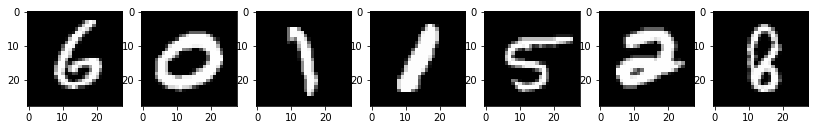

In [40]:
fig = plt.figure(figsize=(14, 4))
for i in range(7):
    fig.add_subplot(1,7,i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
plt.show()
fig = plt.figure(figsize=(14, 4))
for i in range(7):
    fig.add_subplot(1,7,i + 1)
    plt.imshow(X_train[1000 + i].reshape(28, 28), cmap='gray')
plt.show()
fig = plt.figure(figsize=(14, 4))
for i in range(7):
    fig.add_subplot(1,7,i + 1)
    plt.imshow(X_train[6000 + i].reshape(28, 28), cmap='gray')
plt.show()

### Решение с помощью собственной реализации

Инициализация сети

In [59]:
net = Sequential()
net.add(Linear(28*28, 512))
net.add(ReLU())
net.add(Linear(512, 512))
net.add(ReLU())
net.add(Linear(512, 10))
net.add(SoftMax())
criterion = CrossEntropyCriterion()

In [60]:
loss_train_history = []
loss_validation_history = []
optimizer_config = {'learning_rate' : 0.01, 'momentum': 0.9}
optimizer_state = {}

Обучение

In [61]:
n_epoch=15
batch_size=128
learning_rate=0.01

for i in range(n_epoch):

    for x_batch, y_batch in get_batches(X_train, y_train, batch_size):
        net.zeroGradParameters()

        predictions = net.forward(x_batch)
        loss_train = criterion.forward(predictions, y_batch)
        loss_train_history.append(loss_train)

        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)

        sgd_momentum(net.getParameters(), net.getGradParameters(), optimizer_config, optimizer_state)      

        test_idx = np.random.randint(0, X_test.shape[0], batch_size)
        loss_test = criterion.forward(net.forward(X_test[test_idx]),y_test[test_idx])
        loss_validation_history.append(loss_test)

    print('epoch %s: rate = %f, loss_train = %f, loss_test = %f' % (i, learning_rate, loss_train, loss_test))    


epoch 0: rate = 0.010000, loss_train = 0.309063, loss_test = 0.280168
epoch 1: rate = 0.010000, loss_train = 0.312888, loss_test = 0.352510
epoch 2: rate = 0.010000, loss_train = 0.148402, loss_test = 0.206059
epoch 3: rate = 0.010000, loss_train = 0.143679, loss_test = 0.120572
epoch 4: rate = 0.010000, loss_train = 0.120659, loss_test = 0.151286
epoch 5: rate = 0.010000, loss_train = 0.072377, loss_test = 0.115541
epoch 6: rate = 0.010000, loss_train = 0.076168, loss_test = 0.101089
epoch 7: rate = 0.010000, loss_train = 0.182779, loss_test = 0.120116
epoch 8: rate = 0.010000, loss_train = 0.048041, loss_test = 0.075915
epoch 9: rate = 0.010000, loss_train = 0.029272, loss_test = 0.117976
epoch 10: rate = 0.010000, loss_train = 0.027926, loss_test = 0.086635
epoch 11: rate = 0.010000, loss_train = 0.033766, loss_test = 0.011922
epoch 12: rate = 0.010000, loss_train = 0.030182, loss_test = 0.025503
epoch 13: rate = 0.010000, loss_train = 0.023543, loss_test = 0.055808
epoch 14: rate =

Видим, что ошибка монотонно (почти) убывает и равна адекватному небольшому числу в районе $0.01$-$0.03$, значит данная реализация нейронной сети работает правильно.

## Классификация изображений на примере CIFAR-10

В данном задании вам предлагается попробовать различные архитектуры нейронный сетей в задаче классификации изображений. Для экспериментов будет использоваться база маленьких изображений [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html). Данная база состоит из цветных изображений размером 32x32 пикселя разделенных на 10 непересекающихся классов.

<img src="https://thkimorgblog.files.wordpress.com/2016/03/e18489e185b3e1848fe185b3e18485e185b5e186abe18489e185a3e186ba-2016-03-12-e1848be185a9e1848ce185a5e186ab-1-02-16.png" width=500>
</img>

В обучающей выборке содержится 50000 примеров по 5000 примеров на каждый класс. Тестовая выборка состоит из 10000 изображений.


Загрузите [файл](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz) базы. В файле вы найдете обучающую выборку разделенную на пять частей data$\_$batch$\_$[1-5] и тестовую выборку test_batch. Каждую из частей можно загрузить с помощью следующей функции:

In [2]:
import codecs
import cPickle

def unpickle(file):
    fo = codecs.open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

Каждая часть представляет из себя <i>dict</i> объект. Элемент объекта <b>labels</b> содержит список меток изображений (цифры от 0 до 9), а <b>data</b> содержит numpy массив изображений. Данный массив имеет размерность (10000, 3072), то есть каждая строка представляет из себя изображение. Первые 1024 элемента массива соответствуют красному каналу изображения, вторые 1024 элемента $-$ зеленому, последние 1024 элемента $-$ синему. Сами изображения записаны построчно, то есть в рамках 1024 значений, соответствующих каждому из каналов, первые 32 значения $-$ это первая строчка изображения, вторые 32 значения $-$ вторая и т.д.

Загрузите датасет, объединив все обучающие батчи в одну матрицу.

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
data_batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
data_batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
data_batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
data_batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
data_batch_5 = unpickle('cifar-10-batches-py/data_batch_5')
labels_train = np.array(data_batch_1['labels'] + data_batch_2['labels'] + data_batch_3['labels'] \
                + data_batch_4['labels'] + data_batch_5['labels'])
data_train = np.vstack([data_batch_1['data'], data_batch_2['data'], data_batch_3['data'], \
                     data_batch_4['data'], data_batch_5['data']])

In [5]:
test_batch = unpickle('cifar-10-batches-py/test_batch')
labels_test = np.array(test_batch['labels'])
data_test = test_batch['data']

In [6]:
print labels_train.shape
print data_train.shape

(50000,)
(50000, 3072)


In [7]:
print labels_test.shape
print data_test.shape

(10000,)
(10000, 3072)


**(0.5 балла)** С помощью библиотеки [keras](https://keras.io/) обучите небольшую полносвязную сеть на базе CIFAR-10. Сеть должна состоять из двух слоев по 512 нейронов, в качестве функций активации используйте [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks). Для обучения сети используйте стохастический градиентный спуск с [моментумом Нестерова](https://keras.io/optimizers/#sgd). Попытайтесь подобрать начальный <i>learning rate</i>, темп его снижения <i>decay</i>, а также коэффициенты l2 регуляризаторов на весовые коэффициенты сети так, чтобы получить наилучшее качество классификации на тестовой выборке (значение функции потерь cross-entropy и топ-1 ошибку классификации). Диапазоны параметров, с которыми можно провести эксперименты:
- <i>learning rate</i> в диапазоне от 0.005 до 0.1
- decay в диапазоне от 1e-9 до 1e-5
- l2 регуляризация от 1e-6 до 1e-4

Перед обучением необходимо нормализовать обучающую выборку так, чтобы все входные значения были в интервале [0;1].

In [8]:
import keras
from keras.models import Sequential                                    
from keras.layers import Dense, Activation, Dropout                   
from keras.optimizers import SGD                              
from keras.utils.np_utils import to_categorical
from keras.regularizers import l2
from keras import backend as K

Using TensorFlow backend.


In [9]:
def preprocess(X, y):
    X = X.astype('float32')
    X /= 255
    y = to_categorical(y, 10)
    return X, y

In [10]:
X_train, y_train = preprocess(data_train, labels_train)
X_test, y_test = preprocess(data_test, labels_test)

In [12]:
model = Sequential()

model.add(Dense(512, input_dim=len(X_train[0]), init='uniform', W_regularizer=l2(1e-4)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512, init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(10, init='uniform'))
model.add(Activation('softmax'))

sgd = SGD(lr=0.005, momentum=0.9, decay=1e-8, nesterov=True)
model.compile(loss='categorical_crossentropy',
        optimizer=sgd,
        metrics=['accuracy'])

history = model.fit(X_train, y_train,
        nb_epoch=30,
        batch_size=128,
        verbose=1,
        validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, batch_size=128)
print score

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 56s - loss: 2.1104 - acc: 0.2815 - val_loss: 1.8089 - val_acc: 0.3605
Epoch 2/30
50000/50000 [==============================] - 55s - loss: 1.9066 - acc: 0.3679 - val_loss: 1.6852 - val_acc: 0.3978
Epoch 3/30
50000/50000 [==============================] - 56s - loss: 1.8287 - acc: 0.3955 - val_loss: 1.6246 - val_acc: 0.4287
Epoch 4/30
50000/50000 [==============================] - 54s - loss: 1.7734 - acc: 0.4151 - val_loss: 1.5711 - val_acc: 0.4416
Epoch 5/30
50000/50000 [==============================] - 48s - loss: 1.7325 - acc: 0.4304 - val_loss: 1.5501 - val_acc: 0.4545
Epoch 6/30
50000/50000 [==============================] - 48s - loss: 1.6966 - acc: 0.4447 - val_loss: 1.5276 - val_acc: 0.4604
Epoch 7/30
50000/50000 [==============================] - 47s - loss: 1.6690 - acc: 0.4530 - val_loss: 1.4788 - val_acc: 0.4751
Epoch 8/30
50000/50000 [==============================

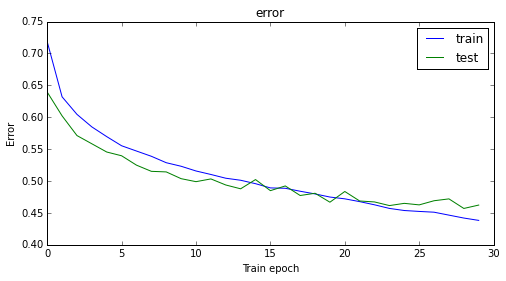

In [14]:
train_error = 1 - np.array(history.history['acc'])
val_error = 1 - np.array(history.history['val_acc'])

plt.figure(figsize=(8, 4))
plt.plot(train_error, label = 'train')
plt.plot(val_error, label = 'test')
plt.title('error')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

Попробуем немного повысить learning rate и decay (большим learning rate лучше не делать, так как в этом случае велик риск застрять в локальном минимуме функции потерь). Также немного понизим регуляризацию.

In [16]:
model2 = Sequential()

model2.add(Dense(512, input_dim=len(X_train[0]), init='uniform', W_regularizer=l2(1e-5)))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(512, init='uniform'))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10, init='uniform'))
model2.add(Activation('softmax'))

sgd2 = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model2.compile(loss='categorical_crossentropy',
        optimizer=sgd2,
        metrics=['accuracy'])

history2 = model2.fit(X_train, y_train,
        nb_epoch=30,
        batch_size=128,
        verbose=1,
        validation_data=(X_test, y_test))

score2 = model2.evaluate(X_test, y_test, batch_size=128)
print score2

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 48s - loss: 1.9249 - acc: 0.3093 - val_loss: 1.7276 - val_acc: 0.3889
Epoch 2/30
50000/50000 [==============================] - 49s - loss: 1.7404 - acc: 0.3800 - val_loss: 1.6312 - val_acc: 0.4234
Epoch 3/30
50000/50000 [==============================] - 55s - loss: 1.6747 - acc: 0.4053 - val_loss: 1.5693 - val_acc: 0.4398
Epoch 4/30
50000/50000 [==============================] - 50s - loss: 1.6318 - acc: 0.4236 - val_loss: 1.5302 - val_acc: 0.4602
Epoch 5/30
50000/50000 [==============================] - 50s - loss: 1.5977 - acc: 0.4356 - val_loss: 1.5585 - val_acc: 0.4304
Epoch 6/30
50000/50000 [==============================] - 49s - loss: 1.5662 - acc: 0.4474 - val_loss: 1.4873 - val_acc: 0.4654
Epoch 7/30
50000/50000 [==============================] - 49s - loss: 1.5392 - acc: 0.4539 - val_loss: 1.4817 - val_acc: 0.4746
Epoch 8/30
50000/50000 [==============================

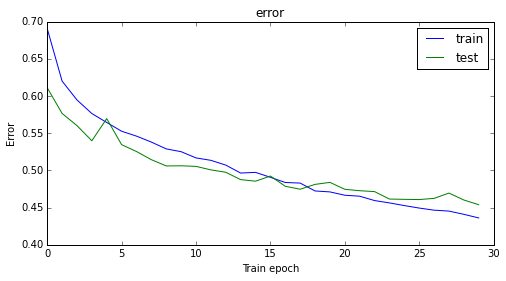

In [17]:
train_error2 = 1 - np.array(history2.history['acc'])
val_error2 = 1 - np.array(history2.history['val_acc'])

plt.figure(figsize=(8, 4))
plt.plot(train_error2, label = 'train')
plt.plot(val_error2, label = 'test')
plt.title('error')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

**Сравнение двух моделей:**

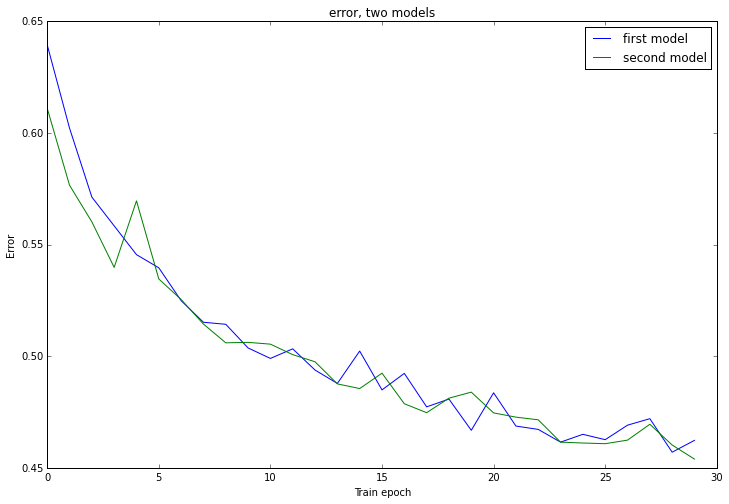

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(val_error, label = 'first model')
plt.plot(val_error2, label = 'second model')
plt.title('error, two models')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

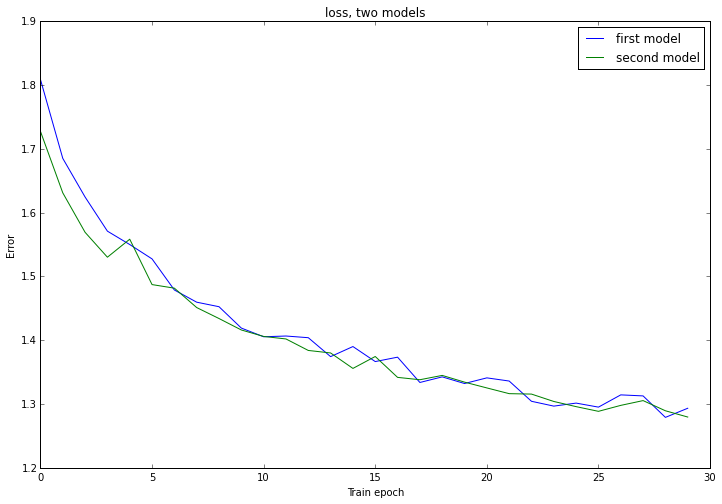

In [27]:
val_loss = np.array(history.history['val_loss'])
val_loss2 = np.array(history2.history['val_loss'])

plt.figure(figsize=(12, 8))
plt.plot(val_loss, label = 'first model')
plt.plot(val_loss2, label = 'second model')
plt.title('loss, two models')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

Две модели ведут себя похоже, но все-таки вторая чуть лучше. Остановлюсь на второй.

**(0.5 балла)** Поэкспериментируйте с размером сети: попробуйте увеличить количество нейронов в каждом слое и общую глубину сети.  Наблюдается ли сильное повышение качества классификации на тестовой выборке?

In [33]:
def compute_deep_net(num_layers, num_neurons, X_train, y_train, X_test, y_test):
    print 'Training neural net with', num_layers, 'layers and', num_neurons, 'neurons'
    deep_model = Sequential()
    deep_model.add(Dense(num_neurons, input_dim=len(X_train[0]), init='uniform', W_regularizer=l2(1e-5)))
    deep_model.add(Activation('relu'))
    deep_model.add(Dropout(0.3))
    
    for n_layer in range(num_layers - 1):
        deep_model.add(Dense(num_neurons, init='uniform', W_regularizer=l2(1e-5)))
        deep_model.add(Activation('relu'))
        deep_model.add(Dropout(0.3))

    deep_model.add(Dense(10, init='uniform', W_regularizer=l2(1e-5)))
    deep_model.add(Activation('softmax'))

    sgd_deep = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
    deep_model.compile(loss='categorical_crossentropy',
            optimizer=sgd_deep,
            metrics=['accuracy'])

    history_deep = deep_model.fit(X_train, y_train,
            nb_epoch=30,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test))
    return deep_model, history_deep

Обучим 4-хслойную сеть с 768 нейронами:

In [34]:
deep_model, history_deep = compute_deep_net(4, 768,  X_train, y_train, X_test, y_test)

Training neural net with 4 layers and 768 neurons
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 152s - loss: 2.0309 - acc: 0.2610 - val_loss: 1.8156 - val_acc: 0.3408
Epoch 2/30
50000/50000 [==============================] - 147s - loss: 1.8150 - acc: 0.3567 - val_loss: 1.6678 - val_acc: 0.3966
Epoch 3/30
50000/50000 [==============================] - 145s - loss: 1.7456 - acc: 0.3862 - val_loss: 1.5861 - val_acc: 0.4330
Epoch 4/30
50000/50000 [==============================] - 149s - loss: 1.7001 - acc: 0.4006 - val_loss: 1.5579 - val_acc: 0.4396
Epoch 5/30
50000/50000 [==============================] - 142s - loss: 1.6646 - acc: 0.4155 - val_loss: 1.5502 - val_acc: 0.4462
Epoch 6/30
50000/50000 [==============================] - 118s - loss: 1.6388 - acc: 0.4244 - val_loss: 1.5096 - val_acc: 0.4556
Epoch 7/30
50000/50000 [==============================] - 114s - loss: 1.6077 - acc: 0.4341 - val_loss: 1.4738 - val_acc: 0.47

In [35]:
score_deep = deep_model.evaluate(X_test, y_test, batch_size=128)
print score_deep

10000/10000 [==============================] - 5s     
[1.3201499908447265, 0.5302]


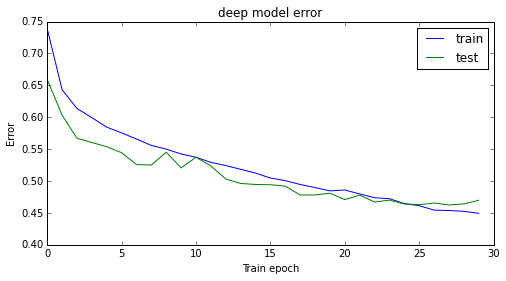

In [40]:
val_loss_deep = np.array(history_deep.history['val_loss'])
error_deep = 1 - np.array(history_deep.history['acc'])
val_error_deep = 1 - np.array(history_deep.history['val_acc'])

plt.figure(figsize=(8, 4))
plt.plot(error_deep, label = 'train')
plt.plot(val_error_deep, label = 'test')
plt.title('deep model error')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

**Сравнение 3-х моделей:**

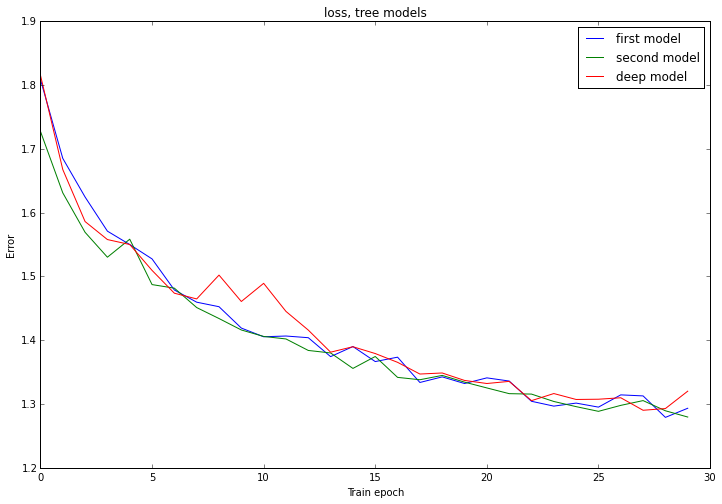

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(val_loss, label = 'first model')
plt.plot(val_loss2, label = 'second model')
plt.plot(val_loss_deep, label = 'deep model')
plt.title('loss, tree models')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

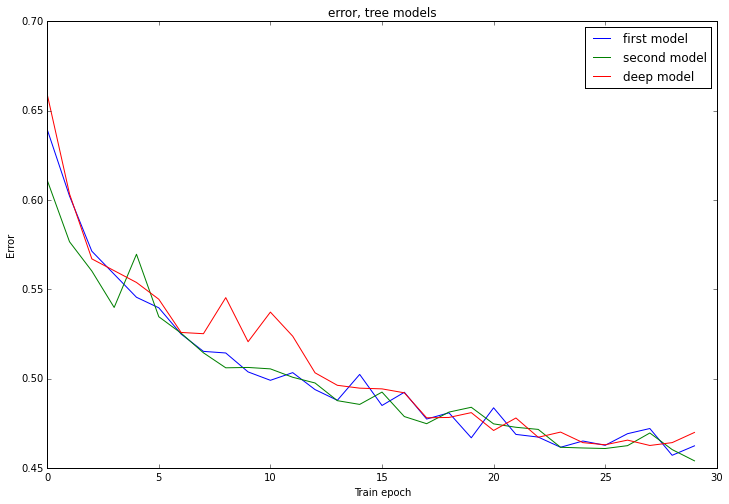

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(val_error, label = 'first model')
plt.plot(val_error2, label = 'second model')
plt.plot(val_error_deep, label = 'deep model')
plt.title('error, tree models')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

Повышение качества классификации на тестовой выборке не наблюдается. Скорее наоборот, наблюдается снижение качества.

Теперь давайте попробуем обучить сверточную сеть небольшого размера. Для этого необходимо вначале изменить формат наших данных, так как сверточные сети работают не с векторами примеров, а с многомерными матрицами примеров. Для этого каждый пример в выборке нужно преобразовать из вектора длины 3072 в матрицу с размерностями (3, 32, 32), где каждый из элементов первой размерности отвечает за свой канал изображения.

In [61]:
X_train.reshape((50000, 3, 32, 32)).shape

(50000, 3, 32, 32)

**(1 балл)** Первая сверточная сеть будет состоять из трех сверточных блоков $-$ последовательностей свертки ([Convolution2D](https://keras.io/layers/convolutional/#convolution2d)), нелинейности (ReLU) и пулинга ([MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d)). При построении сверточной нейронной сети обычно необходимо определить значения нескольких параметров:
- количества ядер свертки, то есть различных карт признаков, в каждом из слоев
- размеры ядер
- тип и размер области слоя пулинга

Карта признаков (feature map) $-$ это результат применения одного ядра свертки ко входам в слой, которые в свою очередь представляют собой множество карт признаков предыдущего слоя.

Для текущего задания размеры фильтров во всех сверточных слоях будут равными 5x5 пикселей, размер области max-пулинга 3x3 пикселя со смещением в 2 пикселя (области пулинга будут перекрываться). Количество ядер в первой сверточном слое возьмем равным 48, во втором $-$ 64, а в третьем $-$ 128.

На практике обычно используют пулинг размером 2x2 без перекрытия областей. Применение такого пулинга приводит к уменьшению в два раза размерности каждой из входных карт признаков. В следующем после пулинга сверточном слое увеличивают количество ядер в два раза. Однако в данной работе необходимо сделать достаточно небольшую и неглубокую сеть, которую можно обучить за разумное время на обычном ноутбуке, поэтому в данном задании мы отступаем от стандартных практик.

После сверточных блоков необходимо добавить в сеть два полносвязных слоя размерности 512 с нелинейностями.
Перед каждым сверточным слоем в сети необходимо добавить слои дополнения нулями входных карт признаков, для того чтобы после операции свертки размеры карт не изменялись. Для этого можете использовать слой [ZeroPadding2D](https://keras.io/layers/convolutional/#zeropadding2d). Подберите значения паддинга таким образом, чтобы после свертки 5x5 получались карты признаков такой же размерности, как и до свертки.

Итоговую архитектуру сети можно вывести после применения метода <i>compile</i> с помощью:
    
    print model.summary()

Попробуйте подобрать начальный learning rate так, чтобы избежать расхождения обучения в самом начале.

Обратите внимание, что обучение подобной сети на ноутбуке в течение 15 эпох может занять около 3-х часов. Для того, чтобы убедиться в корректности составленной архитектуры можно попробовать запустить обучение на подмножестве обучающей выборки и убедиться в том, что ошибка классификации снижается.

In [128]:
from keras.layers import Flatten
from keras.layers import Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D

In [108]:
model_conv = Sequential()
model_conv.add(ZeroPadding2D(padding=(2, 2), input_shape=(32, 32, 3), dim_ordering='tf'))
model_conv.add(Convolution2D(48, 5, 5, border_mode='valid', activation='relu'))
model_conv.add(Activation('relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

model_conv.add(ZeroPadding2D(padding=(2, 2)))
model_conv.add(Convolution2D(64, 5, 5, border_mode='valid', activation='relu'))
model_conv.add(Activation('relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))
          
model_conv.add(ZeroPadding2D(padding=(2, 2)))
model_conv.add(Convolution2D(128, 5, 5, border_mode='valid', activation='relu'))
model_conv.add(Activation('relu'))
model_conv.add(MaxPooling2D(pool_size=(3, 3)))

model_conv.add(Flatten())
model_conv.add(Dense(512, init='uniform'))
model_conv.add(Activation('relu'))
model_conv.add(Dense(512, init='uniform'))
model_conv.add(Activation('relu'))
model_conv.add(Dense(10, init='uniform'))
model_conv.add(Activation('softmax'))

sgd_conv = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_conv.compile(loss='categorical_crossentropy', optimizer=sgd_conv, metrics=['accuracy'])
print(model_conv.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_54 (ZeroPadding2D) (None, 36, 36, 3)     0           zeropadding2d_input_21[0][0]     
____________________________________________________________________________________________________
convolution2d_70 (Convolution2D) (None, 32, 32, 48)    3648        zeropadding2d_54[0][0]           
____________________________________________________________________________________________________
activation_118 (Activation)      (None, 32, 32, 48)    0           convolution2d_70[0][0]           
____________________________________________________________________________________________________
maxpooling2d_60 (MaxPooling2D)   (None, 10, 10, 48)    0           activation_118[0][0]             
___________________________________________________________________________________________

In [109]:
history_conv = model_conv.fit(X_train.reshape((50000, 3, 32, 32)).transpose(0, 2, 3, 1), y_train,
            nb_epoch=15,
            batch_size=128,
            verbose=1,
            validation_data=(X_test.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1), y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 268s - loss: 2.3023 - acc: 0.1053 - val_loss: 2.3008 - val_acc: 0.1021
Epoch 2/15
50000/50000 [==============================] - 266s - loss: 2.2072 - acc: 0.1585 - val_loss: 2.0106 - val_acc: 0.2322
Epoch 3/15
50000/50000 [==============================] - 266s - loss: 1.8923 - acc: 0.2797 - val_loss: 1.7046 - val_acc: 0.3593
Epoch 4/15
50000/50000 [==============================] - 266s - loss: 1.6054 - acc: 0.4004 - val_loss: 1.6310 - val_acc: 0.4098
Epoch 5/15
50000/50000 [==============================] - 267s - loss: 1.3724 - acc: 0.4952 - val_loss: 1.2991 - val_acc: 0.5269
Epoch 6/15
50000/50000 [==============================] - 267s - loss: 1.1981 - acc: 0.5682 - val_loss: 1.1504 - val_acc: 0.5854
Epoch 7/15
50000/50000 [==============================] - 267s - loss: 1.0548 - acc: 0.6244 - val_loss: 1.0522 - val_acc: 0.6318
Epoch 8/15
50000/50000 [=======================

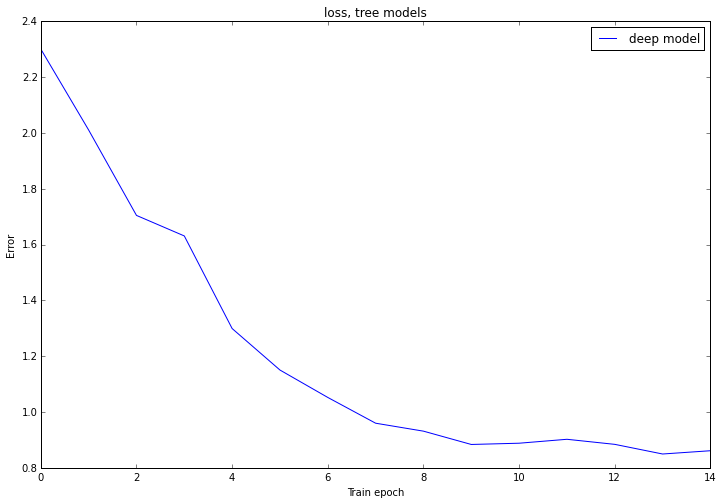

In [112]:
plt.figure(figsize=(12, 8))
plt.plot(history_conv.history['val_loss'], label = 'deep model')
plt.title('loss, convolution')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

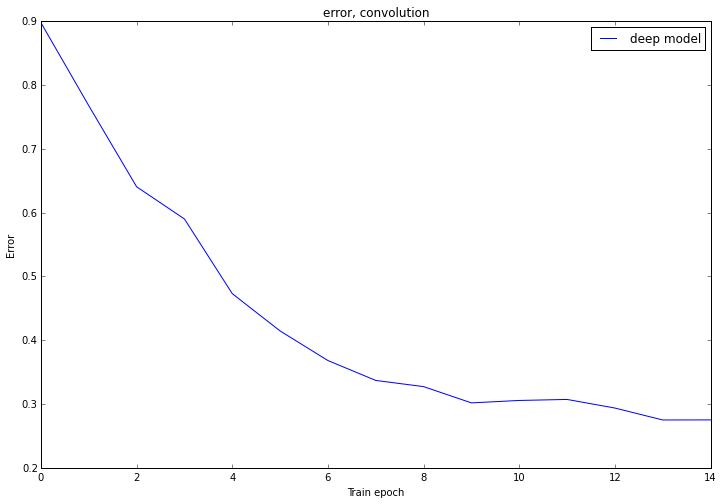

In [115]:
plt.figure(figsize=(12, 8))
plt.plot(1 - np.array(history_conv.history['val_acc']), label = 'deep model')
plt.title('error, convolution')
plt.xlabel('Train epoch')
plt.ylabel('Error')
plt.legend()
plt.show()

Видим, что качество классификации заметно улучшилось.

Большие нейронные сети склонны к переобучению. Для того, чтобы бороться с переобучением, в области распознавания изображений активно применяют техники расширения обучающей выборки. Для этого к обучающим изображениям применяют различные преобразования, которые не меняют класс объекта. В рамках данного задания мы возьмем сверточную сеть, которую обучали ранее, и будем применять ко входным изображениям случайные сдвиги по обеим координатам и горизонтальные перевороты изображения. Для этого можно воспользоваться специальным классом [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator). 

Задайте параметры <i>ImageDataGenerator</i> таким образом, чтобы он осуществлял случайные горизонтальные и вертикальные сдвиги изображения в пределах трех пикселей и случайные горизонтальные перевороты. Также не забудьте правильно выставить порядок размерностей во входных данных в параметре <i>dim_ordering</i> при создании экземпляра класса ImageDataGenerator.

**(1 балл)** Обучите сверточную сеть той же архитектуры, которая использовалась раннее. Как расширение выборки отразилось на качестве классификации на тестовой выборке?

In [116]:
from keras.preprocessing.image import ImageDataGenerator

In [125]:
datagenerator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, dim_ordering='tf')

In [126]:
datagenerator.fit(X_train.reshape((50000, 3, 32, 32)).transpose(0, 2, 3, 1))

Обучим 2-ую модель из предыдущего задания

In [142]:
model2_datagen = Sequential()

model2_datagen.add(Reshape((3072, ), input_shape=(32, 32, 3)))

model2_datagen.add(Dense(512, input_dim=len(X_train[0]), init='uniform', W_regularizer=l2(1e-5)))
model2_datagen.add(Activation('relu'))
model2_datagen.add(Dropout(0.3))
model2_datagen.add(Dense(512, init='uniform'))
model2_datagen.add(Activation('relu'))
model2_datagen.add(Dropout(0.3))
model2_datagen.add(Dense(10, init='uniform'))
model2_datagen.add(Activation('softmax'))

sgd2_datagen = SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=True)
model2_datagen.compile(loss='categorical_crossentropy',
        optimizer=sgd2_datagen,
        metrics=['accuracy'])

model2_datagen.fit_generator(datagenerator.flow(X_train.reshape((50000, 3, 32, 32)).transpose(0, 2, 3, 1), y_train,
                        batch_size=128),
                        nb_epoch=30,
                        samples_per_epoch=len(X_train) * 1.75,
                        validation_data=(X_test.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1), y_test))

Epoch 1/30
87504/87500 [==============================] - 95s - loss: 1.9097 - acc: 0.3146 - val_loss: 1.6661 - val_acc: 0.4139
Epoch 2/30
87584/87500 [==============================] - 94s - loss: 1.7593 - acc: 0.3739 - val_loss: 1.5870 - val_acc: 0.4434
Epoch 3/30
87584/87500 [==============================] - 94s - loss: 1.7065 - acc: 0.3932 - val_loss: 1.5494 - val_acc: 0.4492
Epoch 4/30
87584/87500 [==============================] - 95s - loss: 1.6635 - acc: 0.4095 - val_loss: 1.4773 - val_acc: 0.4786
Epoch 5/30
87504/87500 [==============================] - 96s - loss: 1.6318 - acc: 0.4193 - val_loss: 1.4580 - val_acc: 0.4856
Epoch 6/30
87584/87500 [==============================] - 96s - loss: 1.6093 - acc: 0.4284 - val_loss: 1.4383 - val_acc: 0.4912
Epoch 7/30
87584/87500 [==============================] - 96s - loss: 1.5833 - acc: 0.4368 - val_loss: 1.4180 - val_acc: 0.4961
Epoch 8/30
87584/87500 [==============================] - 96s - loss: 1.5638 - acc: 0.4424 - val_loss: 1

/home/bender/anaconda/lib/python2.7/site-packages/keras/engine/training.py:1480: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


In [143]:
score2_datagen = model2_datagen.evaluate(X_test.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1), y_test, batch_size=128)
print score2_datagen

10000/10000 [==============================] - 2s     
[1.2401998142242432, 0.55559999999999998]


Видим, что расширение выборки немного улучшило результаты. (Было [1.2796147747039794, 0.54610000000000003])